In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import optuna
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle



In [8]:
# Load the dataset
data_path = r'C:\Users\seanc\OneDrive - McGill University\Courses\INSY 695 - ML in Production\Group-Project\INSY695-W24-078-Group-2\final-weather-flight-data\processed_dataset_YUL-Flights-Weather.csv'
df = pd.read_csv(data_path)

LinearRegression - MSE: 0.60, R2: 0.01
RandomForestRegressor - MSE: 0.74, R2: -0.21
GradientBoostingRegressor - MSE: 0.59, R2: 0.04
Grid searching for RandomForestRegressor
Grid searching for GradientBoostingRegressor


[I 2024-02-22 22:15:00,541] A new study created in memory with name: no-name-50836746-4d25-4a5c-aa27-be17c768e198


Super Ensemble - MSE: 0.59, R2: 0.04
Optuna optimization for RandomForestRegressor


[I 2024-02-22 22:17:16,818] Trial 0 finished with value: -1.108024222009414 and parameters: {'n_estimators': 300, 'max_depth': 20, 'min_samples_split': 10}. Best is trial 0 with value: -1.108024222009414.
[I 2024-02-22 22:18:08,973] Trial 1 finished with value: -1.1732242088954723 and parameters: {'n_estimators': 100, 'max_depth': 20, 'min_samples_split': 2}. Best is trial 0 with value: -1.108024222009414.
[I 2024-02-22 22:19:40,125] Trial 2 finished with value: -1.111709089963074 and parameters: {'n_estimators': 200, 'max_depth': None, 'min_samples_split': 10}. Best is trial 0 with value: -1.108024222009414.
[I 2024-02-22 22:20:16,887] Trial 3 finished with value: -1.159259831511925 and parameters: {'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 2}. Best is trial 0 with value: -1.108024222009414.
[I 2024-02-22 22:21:16,133] Trial 4 finished with value: -1.1491085463344135 and parameters: {'n_estimators': 100, 'max_depth': 20, 'min_samples_split': 2}. Best is trial 0 with v

Optuna optimization for GradientBoostingRegressor


[I 2024-02-22 22:33:24,521] Trial 0 finished with value: -1.1189268793501057 and parameters: {'n_estimators': 200, 'learning_rate': 0.2, 'max_depth': 3}. Best is trial 0 with value: -1.1189268793501057.
[I 2024-02-22 22:33:50,695] Trial 1 finished with value: -1.3302216848794506 and parameters: {'n_estimators': 100, 'learning_rate': 0.2, 'max_depth': 10}. Best is trial 0 with value: -1.1189268793501057.
[I 2024-02-22 22:35:11,108] Trial 2 finished with value: -1.2345758540541933 and parameters: {'n_estimators': 300, 'learning_rate': 0.01, 'max_depth': 10}. Best is trial 0 with value: -1.1189268793501057.
[I 2024-02-22 22:35:33,711] Trial 3 finished with value: -1.1184738167205217 and parameters: {'n_estimators': 200, 'learning_rate': 0.01, 'max_depth': 5}. Best is trial 3 with value: -1.1184738167205217.
[I 2024-02-22 22:35:56,365] Trial 4 finished with value: -1.2598118083547307 and parameters: {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 10}. Best is trial 3 with value: -

Optuna Super Ensemble - MSE: 0.59, R2: 0.04


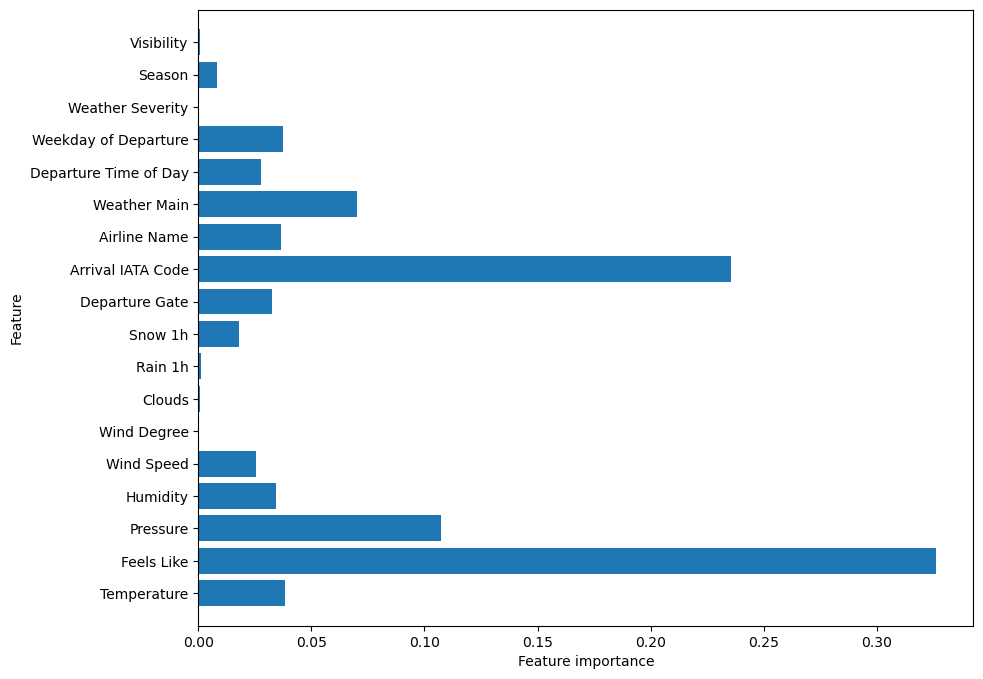

                       importance
Feels Like               0.325448
Arrival IATA Code        0.235621
Pressure                 0.107376
Weather Main             0.070025
Temperature              0.039449
Weekday of Departure     0.037255
Airline Name             0.036585
Humidity                 0.034269
Departure Gate           0.032488
Departure Time of Day    0.027510
Wind Speed               0.025343
Snow 1h                  0.017864
Season                   0.008276
Rain 1h                  0.001215
Clouds                   0.000679
Visibility               0.000597
Wind Degree              0.000000
Weather Severity         0.000000


In [9]:


# Separate features and target variable
X = df.drop('Departure Delay (min)', axis=1)
y = df['Departure Delay (min)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'LinearRegression': LinearRegression(),
    'RandomForestRegressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=42),
}

# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

# Test and validate different models
results = {}
for name, model in models.items():
    mse, r2 = evaluate_model(model, X_train, y_train, X_test, y_test)
    results[name] = {'MSE': mse, 'R2': r2}
    print(f"{name} - MSE: {mse:.2f}, R2: {r2:.2f}")

# Save trained models
with open('trained_models.pkl', 'wb') as f:
    pickle.dump(models, f)

# Define the parameter grid for each model
param_grids = {
    'LinearRegression': {},
    'RandomForestRegressor': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'GradientBoostingRegressor': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10]
    },
    'XGBRegressor': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 6, 9]
    },
    'SVR': {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto'],
        'kernel': ['linear', 'rbf']
    }
}

# Function to perform grid search and update the model with best parameters
def grid_search_tuning(model, params, X_train, y_train):
    grid_search = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

# Perform grid search for each model
best_models = {}
for name in models:
    if param_grids[name]:  # Only perform grid search if there are parameters to tune
        print(f"Grid searching for {name}")
        best_models[name] = grid_search_tuning(models[name], param_grids[name], X_train, y_train)
    else:
        best_models[name] = models[name]  # For models without parameters, use the default

# Create a super ensemble model with the best models
super_ensemble = VotingRegressor(
    estimators=[(name, model) for name, model in best_models.items()]
)

# Evaluate the super ensemble model
mse, r2 = evaluate_model(super_ensemble, X_train, y_train, X_test, y_test)
print(f"Super Ensemble - MSE: {mse:.2f}, R2: {r2:.2f}")

# Update the models dictionary with the best models
models.update(best_models)

# Function to perform optuna optimization and update the model with best parameters
def optuna_optimization(model_class, params, X_train, y_train, n_trials=10):
    def objective(trial):
        # Generate the hyperparameters using the trial object
        hyperparams = {param: trial.suggest_categorical(param, values) for param, values in params.items()}
        estimator = model_class(**hyperparams)
        score = cross_val_score(estimator, X_train, y_train, n_jobs=-1, cv=5, scoring='neg_mean_squared_error')
        return score.mean()  # Optuna tries to maximize the objective, hence return the mean of the negative MSE

    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=n_trials)
    return model_class(**study.best_params)

# Perform optuna optimization for each model
optuna_best_models = {}
for name in models:
    if param_grids[name]:  # Only perform optimization if there are parameters to tune
        print(f"Optuna optimization for {name}")
        optuna_best_models[name] = optuna_optimization(models[name].__class__, param_grids[name], X_train, y_train)

    else:
        optuna_best_models[name] = models[name]  # For models without parameters, use the default

# Create a super ensemble model with the optuna optimized models
optuna_super_ensemble = VotingRegressor(
    estimators=[(name, model) for name, model in optuna_best_models.items()]
)

# Evaluate the optuna super ensemble model
optuna_mse, optuna_r2 = evaluate_model(optuna_super_ensemble, X_train, y_train, X_test, y_test)
print(f"Optuna Super Ensemble - MSE: {optuna_mse:.2f}, R2: {optuna_r2:.2f}")

# Update the models dictionary with the optuna optimized models
models.update(optuna_best_models)

# Visualization pipeline
def plot_feature_importances(model, features):
    n_features = len(features)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

# Plot feature importances for GradientBoostingRegressor 
if 'GradientBoostingRegressor' in models:
    rf_model = models['GradientBoostingRegressor']
    rf_model.fit(X_train, y_train)
    plt.figure(figsize=(10, 8))
    plot_feature_importances(rf_model, X.columns)
    plt.show()


# Print feature importances
if 'GradientBoostingRegressor' in models:
    rf_model = models['GradientBoostingRegressor']
    rf_model.fit(X_train, y_train)
    feature_importances = pd.DataFrame(rf_model.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)
    print(feature_importances)
